**Referred Hritik Jaiswal [Assignment](https://github.com/hritik5102/SHALA2020/blob/master/13-Assignment/Assignment_on_clustering.ipynb) and Rahul D [Assignment](https://github.com/chindimaga/SHALA2020/blob/master/clustering.ipynb) of clustering.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering,KMeans
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_url = "https://raw.githubusercontent.com/Sankalp679/SHALA/master/Assignment_13/assignment_shala_clustering.csv"
data = pd.read_csv(data_url)
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Print summary statistics
data_description = data.describe()
print(data_description)

print("\n")

# Print DataFrame information
data_info = data.info()
print(data_info)

print("\n")

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age            

In [4]:
print("Minimum Age of customers: ",data.Age.min())
print("Maximum Age of customers: ",data.Age.max())

Minimum Age of customers:  18
Maximum Age of customers:  70


In [5]:
# Count number of missing values or nan's
print(data.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
data.shape

(200, 5)

In [7]:
nbins = 1 + int(np.log(len(data)))
print(nbins)

6


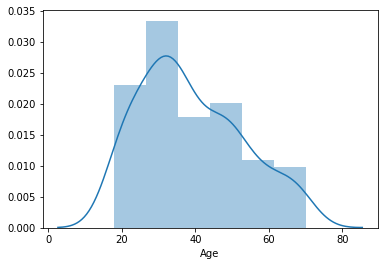

In [8]:
sns.distplot(data.Age, bins = nbins)
plt.show()

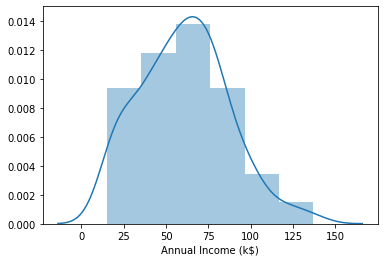

In [9]:
sns.distplot(data['Annual Income (k$)'], bins = nbins)
plt.show()

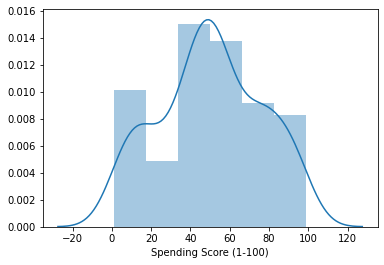

In [10]:
sns.distplot(data['Spending Score (1-100)'], bins = nbins);

From these we understand that none of the data is skewed.We will apply transformation if necessary.


**Try identifing clusters using visual inspection**

Female    112
Male       88
Name: Gender, dtype: int64


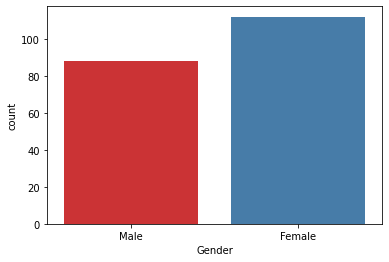

In [11]:
print(data['Gender'].value_counts())
sns.countplot(data['Gender'], palette='Set1')
plt.show()

In [0]:
data['Gender'] = data['Gender'].map( {'Male':1, 'Female':0} )

0    112
1     88
Name: Gender, dtype: int64


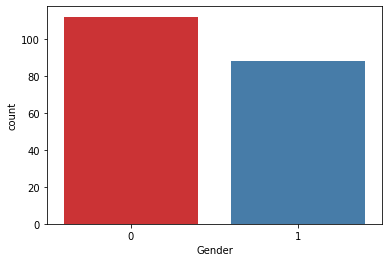

In [13]:
print(data['Gender'].value_counts())
sns.countplot(data['Gender'], palette='Set1')
plt.show()

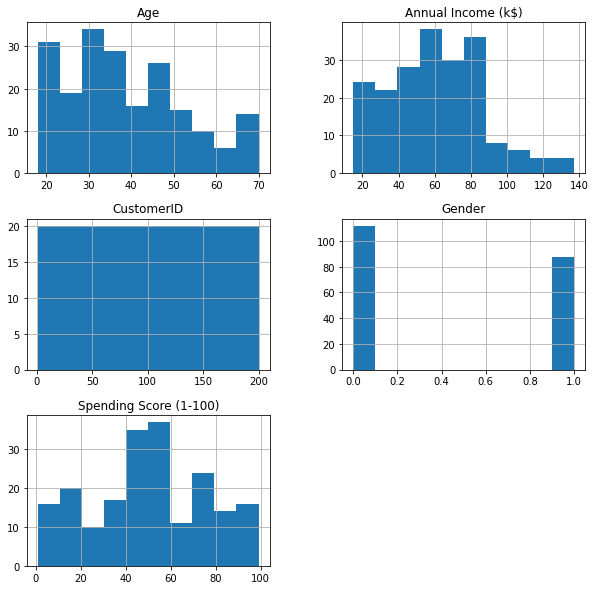

In [14]:
data.hist(figsize=(10,10))
plt.show()

In [0]:
data.drop(columns=['CustomerID'],inplace=True)

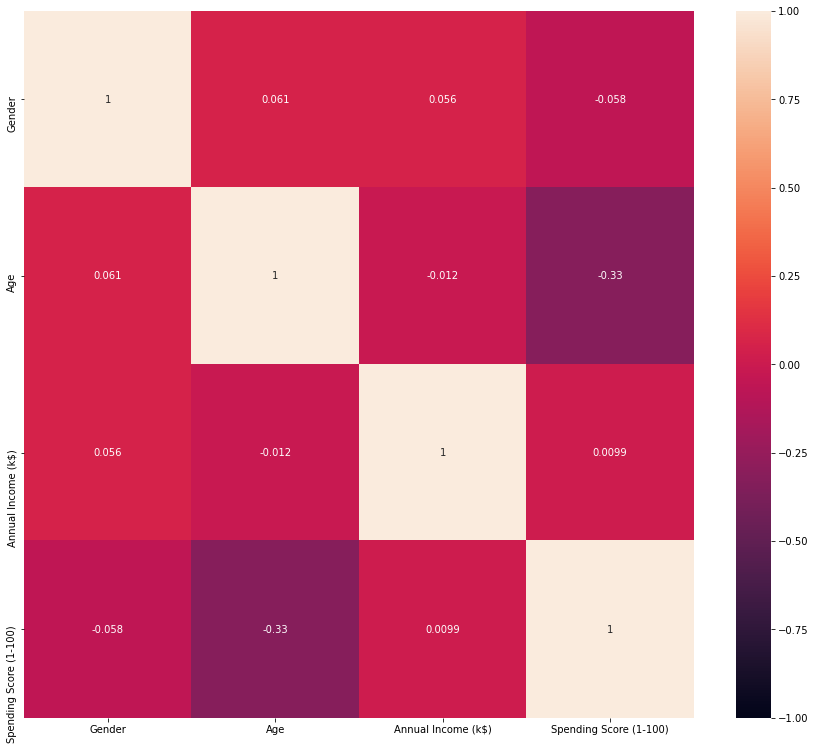

In [16]:
# Creating a mask for removing duplicates
corr=data.corr() 
plt.figure(figsize=(15,13))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1)
plt.show()

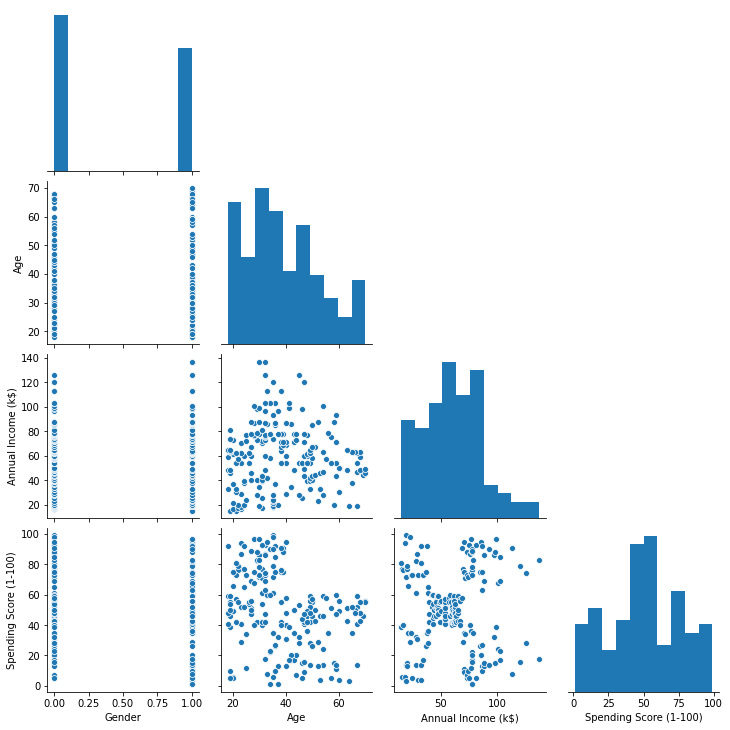

In [17]:
sns.pairplot(data,corner=True)
plt.show()

None above age 40 has a spending score above 

In [0]:
# Features are almost independent. But we can make 5 clusters  approximatelly between annual income and spending score that we understand from pairplots.

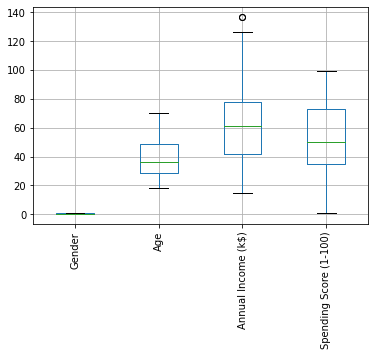

In [19]:
data.boxplot()
plt.xticks(rotation='vertical')
plt.show()

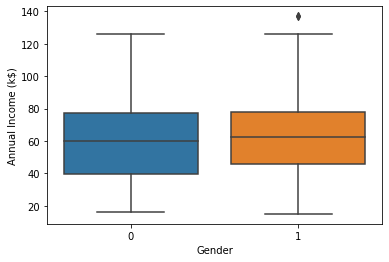

In [20]:
sns.boxplot(x=data['Gender'],y=data['Annual Income (k$)'])
plt.show()

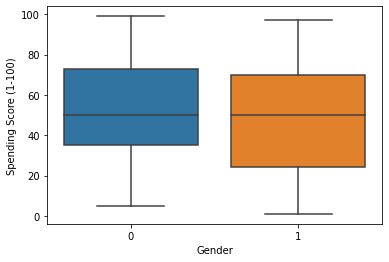

In [21]:
sns.boxplot(x=data['Gender'],y=data['Spending Score (1-100)'])
plt.show()

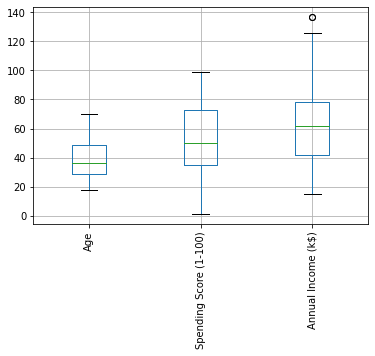

In [22]:
data[['Age','Spending Score (1-100)','Annual Income (k$)']].boxplot()
plt.xticks(rotation='vertical')
plt.show()

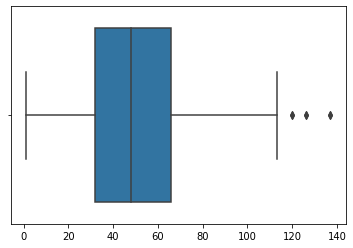

In [23]:
sns.boxplot(data[['Age','Spending Score (1-100)','Annual Income (k$)']])
plt.show()

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

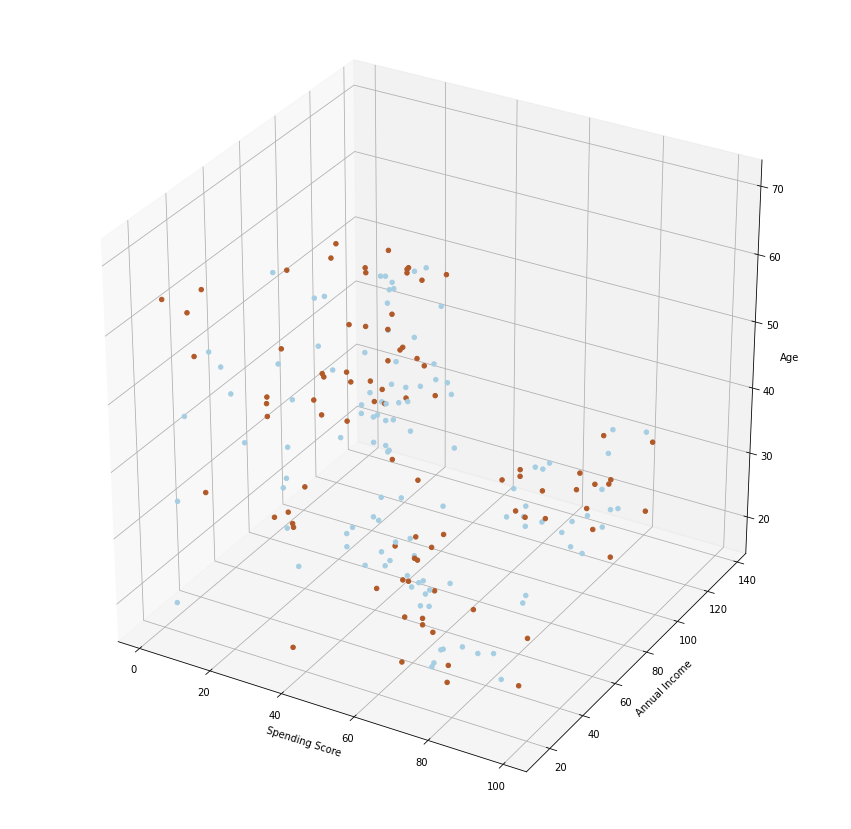

In [25]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Spending Score (1-100)"],data["Annual Income (k$)"],data["Age"] ,c=data["Gender"], depthshade=False, cmap='Paired')
ax.set_xlabel('Spending Score')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Age')
plt.show()

Thus the dataset can be divided in five groups approximately:


1.   Profit Makers:Young people having age below 30 and who spend more rich customers.
2.   Agerage Customers: Customers having age betweeen 20-50 (middle aged) who spend less.
3.   Destructive customers: Customers having low income but have high spending scores.
4.   Cautious people having who have less spending score but high income.
5.  One more category cna be formed having people having low income and low spending score.(Not sure about it) Not understood this point.



**Clustering using mathematical approaches**

In [0]:
# Lets standardize our data so that each feature get equal importance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
dft = scaler.transform(data)

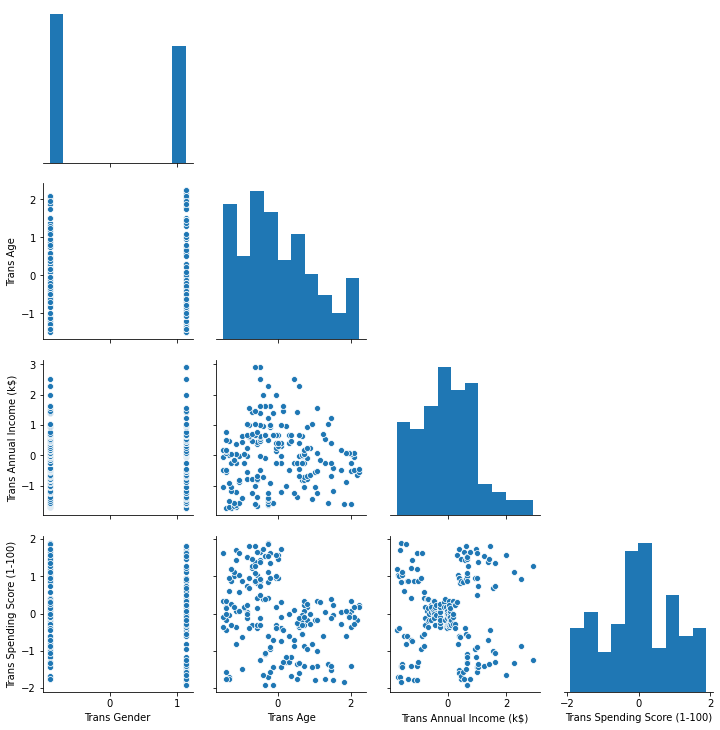

In [29]:
sns.pairplot(pd.DataFrame(dft, columns=list(data.columns)).add_prefix("Trans ") , corner=True);

**K MEANS**

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

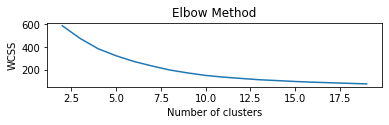

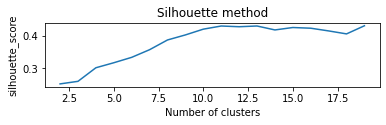

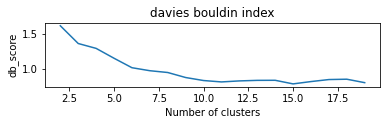

In [31]:
wcss = []
ss = []
db=[]

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=100, random_state=0)
    cluster_labels = kmeans.fit_predict(dft)
    silhouette_avg = silhouette_score(dft, cluster_labels)
    ss.append(silhouette_avg)
    db_s = metrics.davies_bouldin_score(dft, cluster_labels)
    db.append(db_s)
    wcss.append(kmeans.inertia_)
    
#     print(f"for n clusters = {i}")
#     try:
#         print("Silhouette Coefficient: %0.3f"
#   % silhouette_avg)
#     except:
#         pass
#     try:
        
#         print("davies bouldin index: %0.3f"
#   % db_s)
#     except:
#         pass
plt.subplot(3,1,1)    
plt.plot(range(2, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
plt.subplot(3,1,2) 
plt.plot(range(2, 20), ss)
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()
plt.subplot(3,1,3) 
plt.plot(range(2, 20), db)
plt.title('davies bouldin index')
plt.xlabel('Number of clusters')
plt.ylabel('db_score')
plt.show()
# Computes the Davies-Bouldin score.
# The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.
# The minimum score is zero, with lower values indicating better clustering.

In [32]:
for i,d in enumerate(db):
    print(i,d)

0 1.613751463313486
1 1.3607017772566643
2 1.2912333179657467
3 1.1505987533356428
4 1.0157708000108085
5 0.9730537393747599
6 0.9474455399113739
7 0.8759627906936779
8 0.8331029646644399
9 0.8132179958674226
10 0.8277532570625451
11 0.8355619516278543
12 0.8365491487677533
13 0.7852073578594444
14 0.8183034315734281
15 0.8470696708444208
16 0.851973027131695
17 0.8027227842555639


It says we should have 7 clusters. If we can have so any clusters (make these many bussiness plans) its acceptable. K-means is not a good way to cluster this but still lets visulise the result for ncluster = 4 

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must 

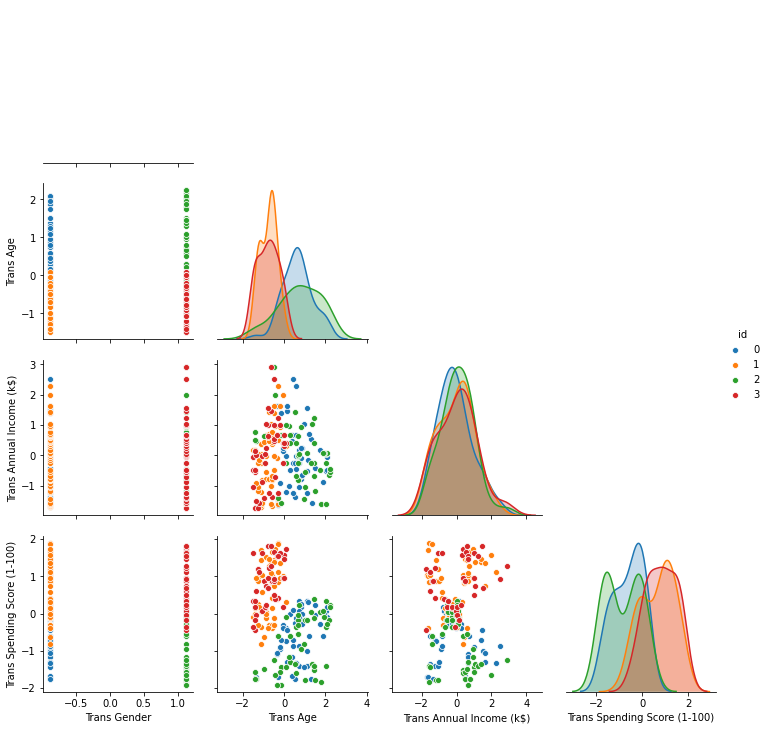

In [33]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000, n_init=100, random_state=0)
cluster_labels = kmeans.fit_predict(dft)
temp = pd.DataFrame(dft, columns=list(data.columns)).add_prefix("Trans ")
temp["id"] = cluster_labels
sns.pairplot(temp, hue="id" , corner=True)
plt.show()

Can be seen that clustering is mostly done by 


1.   spending score and gender (The pairplot between spending score and gender)
2.   age and gender(The pairplot between age and gender)



**cordinates of centers**

In [34]:
kmeans.cluster_centers_

array([[-0.88640526,  0.6644943 , -0.06648421, -0.59855788],
       [-0.88640526, -0.74719196, -0.03409802,  0.67876434],
       [ 1.12815215,  0.75982983,  0.07086791, -0.81492926],
       [ 1.12815215, -0.76072691,  0.05496398,  0.83369302]])

In [35]:
kmeans.transform(dft)

array([[3.35361726, 2.94346696, 2.86211694, 2.29522726],
       [3.72293027, 2.74177772, 3.38871602, 1.90264994],
       [2.82649122, 2.979805  , 3.53161996, 3.74062789],
       [2.9333458 , 1.7496085 , 3.77353087, 2.70664882],
       [2.02397213, 1.95986772, 2.99832188, 2.92570004],
       [2.93585752, 1.72335446, 3.773682  , 2.69036356],
       [2.13564148, 2.91299959, 2.96951568, 3.6897383 ],
       [3.31054544, 1.93012925, 4.10601435, 2.78785287],
       [3.03170857, 4.391698  , 2.20764965, 4.04775959],
       [2.46710062, 1.56525586, 3.39269238, 2.6015749 ],
       [2.9761167 , 4.29767022, 2.16413412, 3.92948129],
       [3.0676214 , 2.02709876, 3.90118589, 2.84819628],
       [1.81355272, 3.3130662 , 2.71321422, 4.00347751],
       [2.80629214, 1.58890614, 3.66806055, 2.60080523],
       [2.7576177 , 3.35188514, 1.9529186 , 2.85533477],
       [3.56532596, 2.59948025, 3.1992227 , 1.68879717],
       [1.72303704, 2.00248807, 2.77157939, 2.96130355],
       [3.41766134, 2.57054772,

In [36]:
temp.columns

Index(['Trans Gender', 'Trans Age', 'Trans Annual Income (k$)',
       'Trans Spending Score (1-100)', 'id'],
      dtype='object')

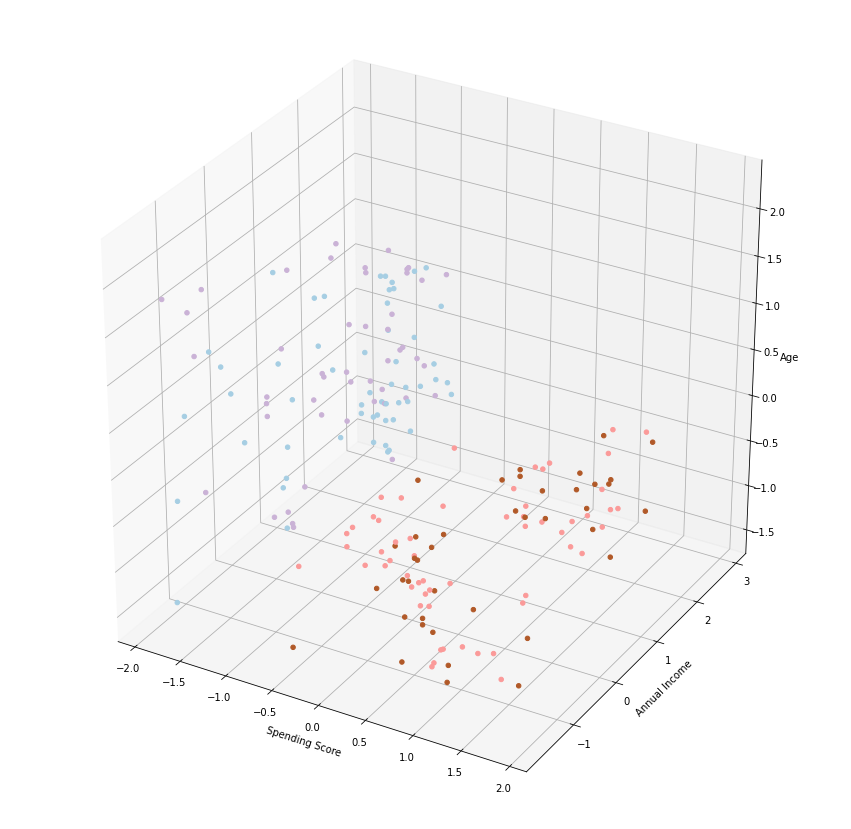

In [37]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(temp['Trans Spending Score (1-100)'],temp['Trans Annual Income (k$)'],temp['Trans Age'] ,c=temp["id"], depthshade=False, cmap='Paired')
ax.set_xlabel('Spending Score')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Age')

plt.show()

In [0]:
# Clearly K means is good strategy to go with but lets try something else

In [0]:
dft_h = dft.copy()
dft_h[:,1] = dft[:,1]*1.5   #here doubt of shape dft_h[:,1].shape is of shape (200,) instead (,200) I think here (200,) ,means 200 columns in (200,) or it dispaly size of array
dft_h[:,2] = dft[:,2]*2
dft_h[:,3] = dft[:,3]*2.5

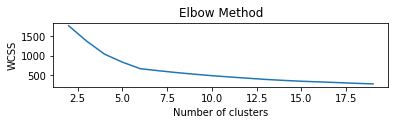

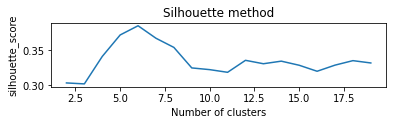

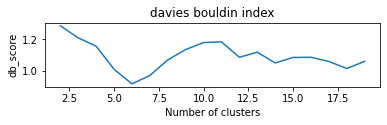

In [40]:
wcss = []
ss = []
db=[]

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=100, random_state=0)
    cluster_labels = kmeans.fit_predict(dft_h)
    silhouette_avg = silhouette_score(dft_h, cluster_labels)
    ss.append(silhouette_avg)
    db_s = metrics.davies_bouldin_score(dft_h, cluster_labels)
    db.append(db_s)
    wcss.append(kmeans.inertia_)
    
#     print(f"for n clusters = {i}")
#     try:
#         print("Silhouette Coefficient: %0.3f"
#   % silhouette_avg)
#     except:
#         pass
#     try:
        
#         print("davies bouldin index: %0.3f"
#   % db_s)
#     except:
#         pass
plt.subplot(3,1,1)    
plt.plot(range(2, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
plt.subplot(3,1,2) 
plt.plot(range(2, 20), ss)
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()
plt.subplot(3,1,3) 
plt.plot(range(2, 20), db)
plt.title('davies bouldin index')
plt.xlabel('Number of clusters')
plt.ylabel('db_score')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=1000, n_init=100, random_state=0)
cluster_labels = kmeans.fit_predict(dft_h)
silhouette_avg = silhouette_score(dft_h, cluster_labels)
db_s = metrics.davies_bouldin_score(dft_h, cluster_labels)
print("Silhouette Coefficient: %0.3f"
% silhouette_avg)

print("davies bouldin index: %0.3f"
% db_s)

Silhouette Coefficient: 0.385
davies bouldin index: 0.919


In [0]:
centers = kmeans.cluster_centers_            #Not understood why we have to divide centers by respective numbers.
centers[:,1] /=1.5                           #And not understood why we have took inverse_transform on centers.
centers[:,2] /=2                             #It we would take inverse transform on dft dataframe on which we have done transform it would be understandable.But why to do on center the inverse_transform
centers[:,3] /=2.5
centers = scaler.inverse_transform(centers) 

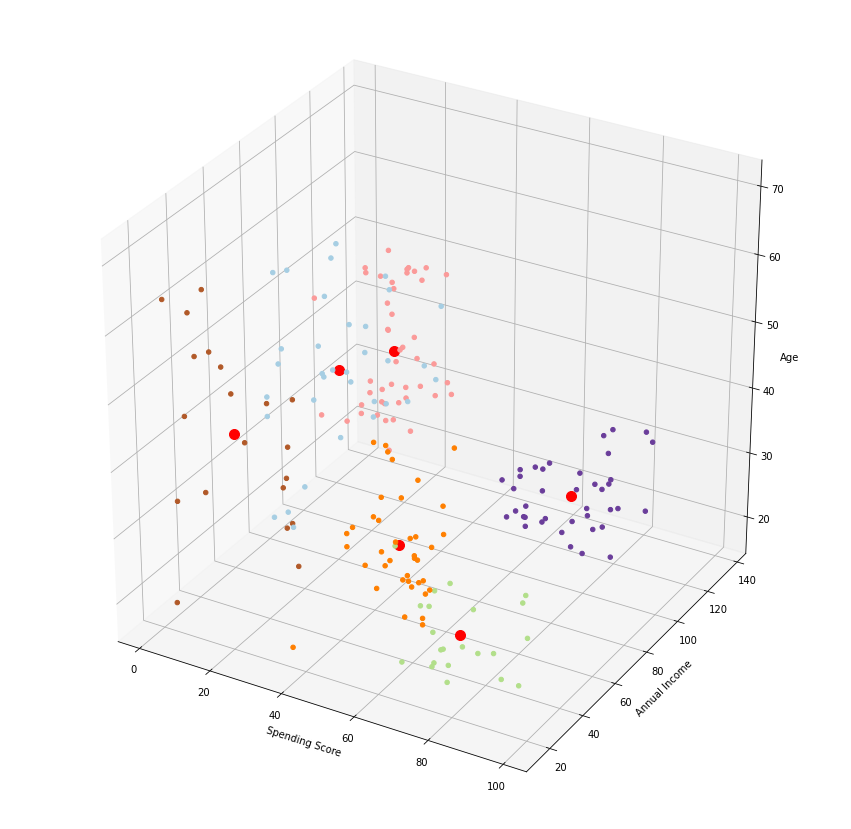

In [43]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Spending Score (1-100)"],data["Annual Income (k$)"],data["Age"] ,c=cluster_labels, depthshade=False, cmap='Paired')
ax.scatter(centers[:,3],centers[:,2],centers[:,1] ,c='r',s = 100, depthshade=False, cmap='Paired')
ax.set_xlabel('Spending Score')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Age')
plt.show()

**Density-based spatial clustering of applications with noise (DBSCAN)**

In [44]:
from sklearn.cluster import DBSCAN


rad = [0.3,1.0,3,10]

for i in range(2,21):
    for j in rad:

        # Compute DBSCAN
        db = DBSCAN(eps=j, min_samples=i, n_jobs=-1).fit(dft)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
     
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        if n_noise_<=len(labels)*0.05 and n_clusters_>1:
            print(f"eps={j}, min_samples={i}")
            print('Estimated number of clusters: %d' % n_clusters_)
            print('Estimated number of noise points: %d' % n_noise_)
            try:
                print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(dft, labels))
            except:
                pass
            try:
                print("davies bouldin index: %0.3f"
          % metrics.davies_bouldin_score(dft, labels))
            except:
                pass

eps=1.0, min_samples=2
Estimated number of clusters: 6
Estimated number of noise points: 2
Silhouette Coefficient: 0.097
davies bouldin index: 1.053
eps=1.0, min_samples=3
Estimated number of clusters: 3
Estimated number of noise points: 8
Silhouette Coefficient: 0.213
davies bouldin index: 2.602
eps=1.0, min_samples=4
Estimated number of clusters: 3
Estimated number of noise points: 8
Silhouette Coefficient: 0.213
davies bouldin index: 2.602


**eps=1.0, min_samples=2 Estimated number of clusters: 6 Estimated number of noise points: 2 is good. davies bouldin is good but silhouette is not.So here davies bouldin is a better metric**

In [45]:
rad = [round(x,1) * 0.1 for x in range(5, 20,2)]
for i in range(2,8):
    for j in rad:

        db = DBSCAN(eps=j, min_samples=i, n_jobs=-1).fit(dft)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        if n_noise_<=len(labels)*0.05 and n_clusters_>1:
            print(f"eps={j}, min_samples={i}")
            print('Estimated number of clusters: %d' % n_clusters_)
            print('Estimated number of noise points: %d' % n_noise_)
            try:
                print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(dft, labels))
            except:
                pass
            try:
                print("davies bouldin index: %0.3f"
          % metrics.davies_bouldin_score(dft, labels))
            except:
                pass

eps=0.7000000000000001, min_samples=2
Estimated number of clusters: 12
Estimated number of noise points: 8
Silhouette Coefficient: 0.090
davies bouldin index: 1.233
eps=0.9, min_samples=2
Estimated number of clusters: 5
Estimated number of noise points: 4
Silhouette Coefficient: 0.124
davies bouldin index: 1.564
eps=1.1, min_samples=2
Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette Coefficient: 0.278
davies bouldin index: 1.612
eps=1.3, min_samples=2
Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette Coefficient: 0.278
davies bouldin index: 1.612
eps=1.5, min_samples=2
Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette Coefficient: 0.278
davies bouldin index: 1.612
eps=1.7000000000000002, min_samples=2
Estimated number of clusters: 2
Estimated number of noise points: 0
Silhouette Coefficient: 0.278
davies bouldin index: 1.612
eps=1.9000000000000001, min_samples=2
Estimated number of clusters: 2
Estim

**In k means we did se that gender was affecting too much. lets try to reduce its affect**

In [0]:
dft_g = dft.copy()
dft_g[:,0] = dft[:,0]/2

In [47]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

rad = [0.3,1.0,3,10]

for i in range(2,21):
    for j in rad:

        # Compute DBSCAN
        db = DBSCAN(eps=j, min_samples=i, n_jobs=-1).fit(dft_g)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)     #Not understood the use of mask here
        core_samples_mask[db.core_sample_indices_] = True             #and here.
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        if n_noise_<=len(labels)*0.05 and n_clusters_>1:
            print(f"eps={j}, min_samples={i}")
            print('Estimated number of clusters: %d' % n_clusters_)
            print('Estimated number of noise points: %d' % n_noise_)
            try:
                print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(dft_g, labels))
            except:
                pass
            try:
                print("davies bouldin index: %0.3f"
          % metrics.davies_bouldin_score(dft_g, labels))
            except:
                pass

eps=1.0, min_samples=2
Estimated number of clusters: 6
Estimated number of noise points: 2
Silhouette Coefficient: -0.028
davies bouldin index: 1.478
eps=1.0, min_samples=3
Estimated number of clusters: 3
Estimated number of noise points: 8
Silhouette Coefficient: 0.069
davies bouldin index: 2.894
eps=1.0, min_samples=4
Estimated number of clusters: 3
Estimated number of noise points: 8
Silhouette Coefficient: 0.069
davies bouldin index: 2.894


In [48]:
lamb = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
rad = [0.3,1.0,3,10]
for k in lamb:
    dft_g = dft.copy()
    dft_g[:,0] = dft[:,0]*k
    for i in range(2,10):
        for j in rad:

            # Compute DBSCAN
            db = DBSCAN(eps=j, min_samples=i, n_jobs=-1).fit(dft_g)
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            # Number of clusters in labels, ignoring noise if present.
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)
            if n_noise_<=len(labels)*0.05 and n_clusters_>1:
                print(f"for lamda = {k}")
                print(f"eps={j}, min_samples={i}")
                print('Estimated number of clusters: %d' % n_clusters_)
                print('Estimated number of noise points: %d' % n_noise_)
                try:
                    print("Silhouette Coefficient: %0.3f"
              % metrics.silhouette_score(dft_g, labels))
                except:
                    pass
                try:
                    print("davies bouldin index: %0.3f"
              % metrics.davies_bouldin_score(dft_g, labels))
                except:
                    pass

for lamda = 0.4
eps=1.0, min_samples=2
Estimated number of clusters: 2
Estimated number of noise points: 2
Silhouette Coefficient: 0.103
davies bouldin index: 0.893
for lamda = 0.5
eps=1.0, min_samples=2
Estimated number of clusters: 6
Estimated number of noise points: 2
Silhouette Coefficient: -0.028
davies bouldin index: 1.478
for lamda = 0.5
eps=1.0, min_samples=3
Estimated number of clusters: 3
Estimated number of noise points: 8
Silhouette Coefficient: 0.069
davies bouldin index: 2.894
for lamda = 0.5
eps=1.0, min_samples=4
Estimated number of clusters: 3
Estimated number of noise points: 8
Silhouette Coefficient: 0.069
davies bouldin index: 2.894
for lamda = 0.6
eps=1.0, min_samples=2
Estimated number of clusters: 6
Estimated number of noise points: 2
Silhouette Coefficient: -0.001
davies bouldin index: 1.336
for lamda = 0.6
eps=1.0, min_samples=3
Estimated number of clusters: 3
Estimated number of noise points: 8
Silhouette Coefficient: 0.100
davies bouldin index: 2.781
for lamd

Silhouette Coefficient sometimes negative.db reduced by a bit. so idea not useful.
As we are in business maybe we need to put more emphasis on sales score. Lets try it 

In [0]:
dft_s = dft.copy()
dft_s[:,-1] = dft[:,-1]*1.5

In [50]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

rad = [0.3,1.0,3,10]

for i in range(2,21):
    for j in rad:

        # Compute DBSCAN
        db = DBSCAN(eps=j, min_samples=i, n_jobs=-1).fit(dft_s)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        if n_noise_<=len(labels)*0.05 and n_clusters_>1:
            print(f"eps={j}, min_samples={i}")
            print('Estimated number of clusters: %d' % n_clusters_)
            print('Estimated number of noise points: %d' % n_noise_)
            try:
                print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(dft_g, labels))
            except:
                pass
            try:
                print("davies bouldin index: %0.3f"
          % metrics.davies_bouldin_score(dft_g, labels))
            except:
                pass

eps=1.0, min_samples=2
Estimated number of clusters: 4
Estimated number of noise points: 6
Silhouette Coefficient: 0.174
davies bouldin index: 1.646
eps=1.0, min_samples=3
Estimated number of clusters: 3
Estimated number of noise points: 8
Silhouette Coefficient: 0.213
davies bouldin index: 2.602
eps=1.0, min_samples=4
Estimated number of clusters: 4
Estimated number of noise points: 8
Silhouette Coefficient: 0.164
davies bouldin index: 2.341


**Not helpful**

Acceptable results from db scan
eps=1.5, min_samples=4 Estimated number of clusters: 2 Estimated number of noise points: 0 Silhouette Coefficient: 0.278 davies bouldin index: 1.612

eps=0.9, min_samples=2 Estimated number of clusters: 5 Estimated number of noise points: 4 Silhouette Coefficient: 0.124 davies bouldin index: 1.564

DB scan tells us that its best to divide into two cluster. If further information about the problem is given we can take a decision. Dividing into 5 cluster is also not a bad option. Lets visualise the results

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


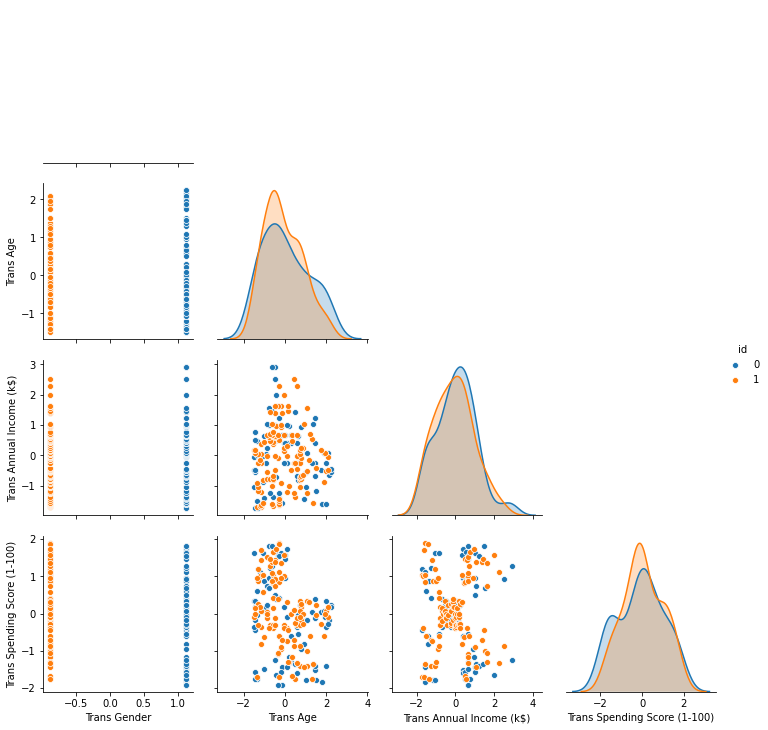

In [51]:
db = DBSCAN(eps=1.5, min_samples=4, n_jobs=-1).fit(dft)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
temp = pd.DataFrame(dft, columns=list(data.columns)).add_prefix("Trans ")
temp["id"] = labels
sns.pairplot(temp, hue="id" , corner=True);
plt.show()

In [0]:
db = DBSCAN(eps=0.9, min_samples=2, n_jobs=-1).fit(dft)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
temp = pd.DataFrame(dft, columns=list(data.columns)).add_prefix("Trans ")
temp["id"] = labels
# sns.pairplot(temp, hue="id" , corner=True);

In [53]:
temp.id.value_counts()

 1    111
 0     77
 2      4
-1      4
 4      2
 3      2
Name: id, dtype: int64

In [54]:
temp.corr()

,Trans Gender,Trans Age,Trans Annual Income (k$),Trans Spending Score (1-100),id
Trans Gender,1.000000,0.060867,0.056410,-0.058109,-0.543924
Trans Age,0.060867,1.000000,-0.012398,-0.327227,0.042772
Trans Annual Income (k$),0.056410,-0.012398,1.000000,0.009903,-0.023810
Trans Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000,0.011159
id,-0.543924,0.042772,-0.023810,0.011159,1.000000


Its mostly classifying on the basis of gender.Spending score is second priorty. Depends on the bussiness whether we have to accept this or reject this.

**Agglomerative clustering**

In [0]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

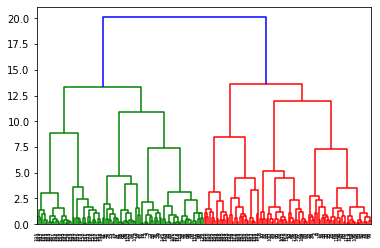

In [56]:
dendrogram = sch.dendrogram(sch.linkage(dft, method='ward'))

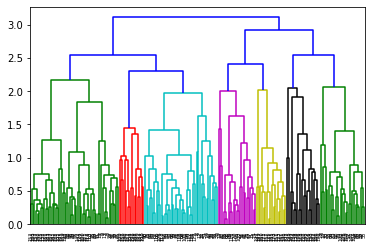

In [57]:
dendrogram = sch.dendrogram(sch.linkage(dft, method='average'))

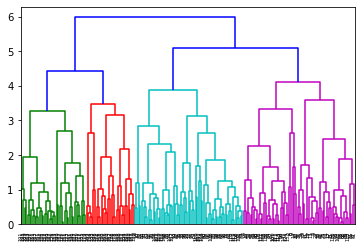

In [58]:
dendrogram = sch.dendrogram(sch.linkage(dft, method='complete'))

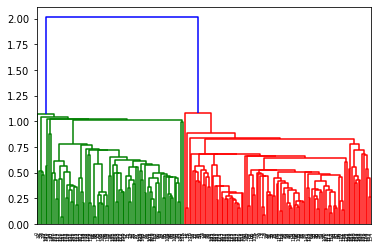

In [59]:
dendrogram = sch.dendrogram(sch.linkage(dft, method='single'))

In [0]:
dft_s = dft.copy()
dft_s[:,-1] = dft[:,-1]*2
dft_s[:,-2] = dft[:,-2]*1.5

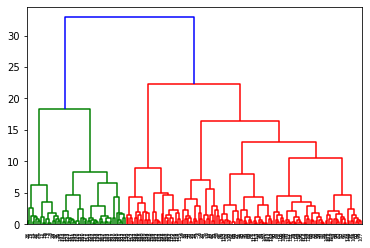

In [61]:
dendrogram = sch.dendrogram(sch.linkage(dft_s, method='ward'))

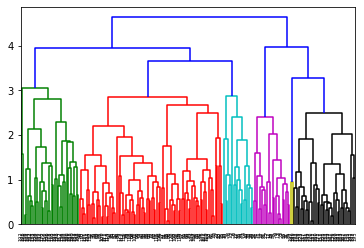

In [62]:
dendrogram = sch.dendrogram(sch.linkage(dft_s, method='average'))

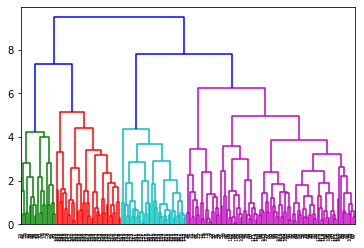

In [63]:
dendrogram = sch.dendrogram(sch.linkage(dft_s, method='complete'))

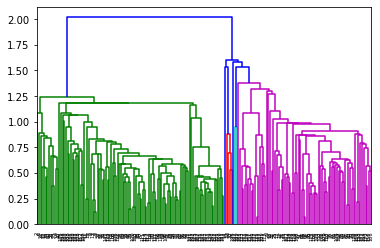

In [64]:
dendrogram = sch.dendrogram(sch.linkage(dft_s, method='single'))

The method average with n_clusters 5 with dft_s(transformed version of data with more importance on spending score and annual income) is great

More analysis can be done if we have more information like profitability, time since they started business etc

In [0]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')        # Not understood in affinity defination scikit learn.If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.
model.fit(dft_s)
labels = model.labels_

In [66]:
try:
    print("Silhouette Coefficient: %0.3f"
% metrics.silhouette_score(dft_s, labels))
except:
    pass
try:
    print("davies bouldin index: %0.3f"
% metrics.davies_bouldin_score(dft_s, labels))
except:
    pass

Silhouette Coefficient: 0.345
davies bouldin index: 1.045


Both the metric shows better performance and we even got 5 clusters. Tuned hyperparameters mannually.

If its a fashion store whre male and females give differt business, this is great clustering.But what if its a grocery store!!  
Then we will drop the column of gender or we can further increase the weights on the sales and annual income and age

In [0]:
dft_h = dft.copy()
dft_h[:,1] = dft[:,1]*1.5
dft_h[:,2] = dft[:,2]*2
dft_h[:,3] = dft[:,3]*2.5

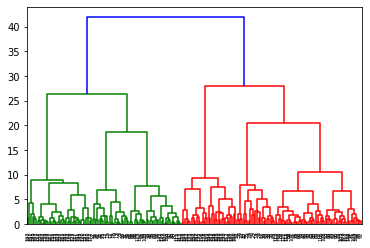

In [69]:
dendrogram = sch.dendrogram(sch.linkage(dft_h, method='ward'))

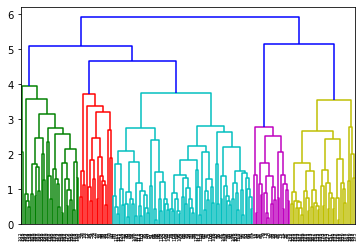

In [70]:
dendrogram = sch.dendrogram(sch.linkage(dft_h, method='average'))

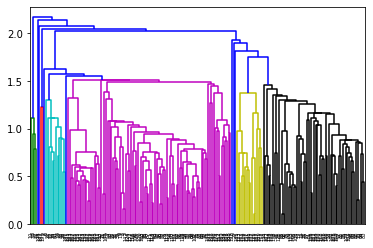

In [71]:
dendrogram = sch.dendrogram(sch.linkage(dft_h, method='single'))

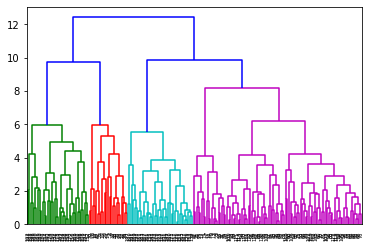

In [72]:
dendrogram = sch.dendrogram(sch.linkage(dft_h, method='complete'))        #Not understood how to decide number of clusters. Whether it should be based on change of color of branches or on basis of our needs or by plotting and finding clusters at particular distance

In [0]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
model.fit(dft_h)
labels = model.labels_

In [85]:
silhouette_avg = metrics.silhouette_score(dft_h, labels)
db_s = metrics.davies_bouldin_score(dft_h, labels)
print("Silhouette Coefficient: %0.3f"
% silhouette_avg)

print("davies bouldin index: %0.3f"
% db_s)

Silhouette Coefficient: 0.373
davies bouldin index: 0.930


method ward shows promising results in this. We can take decision based on the business we are in and plan accordingly 
These are great results . Low davies bouldin index and higher Silhouette Coefficient.Thats awsome

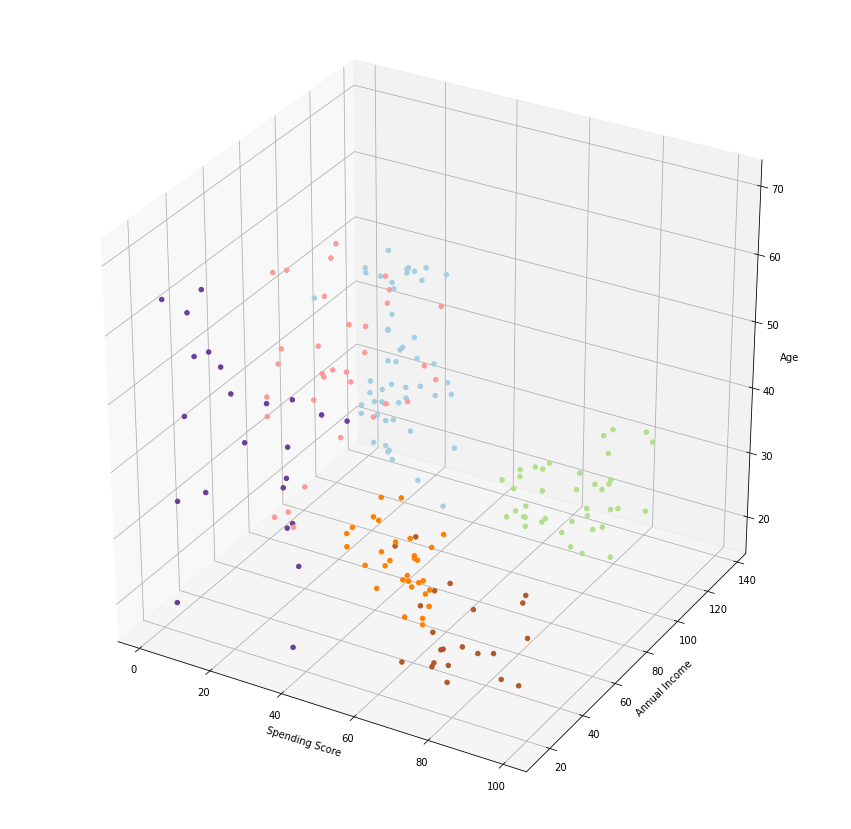

In [75]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Spending Score (1-100)"],data["Annual Income (k$)"],data["Age"] ,c=labels, depthshade=False, cmap='Paired')

ax.set_xlabel('Spending Score')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Age')

plt.show()

Thus we can use six clusters.
Now explaining the reson for such clusters and brief market strategies xD.

1.   For the **green** cluster. They are young and earn a lot. And lucky us  they spend a lot too. These are the customers which give us the maximum profit for long time. Treat them well and we can attract them to buy more stuff by adds and other mediums. Inshort they are the best #VIP customers. 
2.   For the **brown** cluster, these guys spend a lot but they have less income. We hope that their father is loaded so that they can continue giving us good bussiness. Maybe they are using the credit from banks to buy stuff. We can help them to control the flow of their money by making them invest in the right stuff from our  store if not they are going to be bankrupted and our profits will reduce.
3. For the **pale blue**  cluster they have lots of money, but they are not ready to spend it. They maybe disatisfied by our products. So we can ask them for feedback and try to improve. They may be unaware of our products so its our job to make them understand the importance of our product sto them

4. For the **orange** cluster, they are people with average income and spend the right amount on our products. In short happy customers.

5. For the **purple** cluster , they earn less and spend less. They donot add up much to the profit of the company. But its always good to have more customers. 

6. For the **pink**  cluster they have money decent, but they are not ready to spend it. They are cautious and spend money only on extreamly essentials. They may be unaware of our products so its our job to make them understand the importance of our product sto them


---

